 # AIRLINE PASSENGER SATISFACTION DATA ANALYSIS


#### By: Tansu Ayaz

**CONTENT**
##### -Project Description
##### -Objective
##### -Summary

**PROJECT DESCRIPTION**

This data given by an airline organization. The actual name of the company is not given due to various purposes.
The purpose of our analysis is to determine the important factors that affect passenger satisfaction to the airline company.
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger
This data set have a 25976 rows with 25 columns.
The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.
Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

**DATA CLEANING AND VISUALISATION**

In this project, the Arrival Delay in Minutes column has 310 missing values in it. 
I cleaned the data for fill column nan value at “Arrival Delay in Minutes” using the mean.
The reason why i used mean because my data has normal distribution and the data did not have outliers. I removed Unnamed column from data.
ID column was integer. I changed the ID column to category using category index function.
Basically, data cleaning consists of processes like removing duplicate values, filling missing values and replacing missing values.
We will learn more understanding and detailed about data with data visualization.



**In this project, I utilize different Python packages, including:**

   ##### - Pandas
   ##### - Numpy
   ##### - Matplotlib
   ##### - Seaborn
   ##### - itertools



 **OBJECTIVES**

#### This analysis is to answer the following questions:

#### 1. What is the percentage of satisfaction level of passangers with the airline?
#### 2. Are there any differences in satisfaction levels between different customer segments (e.g.,regular customer, business or personal travelers)?
#### 3. Which factors contribute most to customer satisfaction?
#### 4. What is the relationship between satisfaction and any differences in satisfaction levels between different in-flight services (e.g., entertainment, food and drinks)?
#### 5. What is the relationship between satisfaction and flight delays?
#### 7. Is there any correlation with variables?
#### 8. Do some exploring in the data, any interesting insights.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import seaborn as sns
import itertools

style.use('seaborn-poster')
style.use('fivethirtyeight')
%matplotlib inline


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
dt = pd.read_csv("EXCELDATAtest.csv")

In [36]:
import matplotlib.pyplot as plt# inspired by http://nipunbatra.github.io/2014/08/latexify/
plt.style.use(['default'])
params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    'font.size': 12, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.facecolor':'white',
    'font.family': 'serif',

}
plt.rcParams.update(params)

In [13]:
dt.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [14]:
dt.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [15]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [16]:
print("Database dimension - dt :",dt.shape)
print("Database size - dt      :",dt.size)

Database dimension - dt : (25976, 25)
Database size - dt      : 649400


In [17]:
dt.index    ### data starts from 0 and last position is 25976

RangeIndex(start=0, stop=25976, step=1)

In [18]:
dt.columns   ### these are name of the each column name

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [19]:
dt.dtypes  ### it shows the data type of each column

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [20]:
dt.count() ### it shows the total # of non-null values in each column

Unnamed: 0                           25976
id                                   25976
Gender                               25976
Customer Type                        25976
Age                                  25976
Type of Travel                       25976
Class                                25976
Flight Distance                      25976
Inflight wifi service                25976
Departure/Arrival time convenient    25976
Ease of Online booking               25976
Gate location                        25976
Food and drink                       25976
Online boarding                      25976
Seat comfort                         25976
Inflight entertainment               25976
On-board service                     25976
Leg room service                     25976
Baggage handling                     25976
Checkin service                      25976
Inflight service                     25976
Cleanliness                          25976
Departure Delay in Minutes           25976
Arrival Del

In [21]:
# Remove Unnamed column from data
dt = dt.drop(dt.iloc[:,[0]], axis = 1)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [22]:
categ_indexs = [0]
dt.iloc[:,categ_indexs] = dt.iloc[:,categ_indexs].astype('category')

In [23]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 25976 non-null  category
 1   Gender                             25976 non-null  object  
 2   Customer Type                      25976 non-null  object  
 3   Age                                25976 non-null  int64   
 4   Type of Travel                     25976 non-null  object  
 5   Class                              25976 non-null  object  
 6   Flight Distance                    25976 non-null  int64   
 7   Inflight wifi service              25976 non-null  int64   
 8   Departure/Arrival time convenient  25976 non-null  int64   
 9   Ease of Online booking             25976 non-null  int64   
 10  Gate location                      25976 non-null  int64   
 11  Food and drink                     25976 

In [24]:
dt.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [25]:
(dt.isnull().sum()/(len(dt)))*100   #### The percentage of missing values for the columns Arrival Delay in Minutes  is 0.32% , respectively.

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [26]:
from statistics import *

In [27]:
dt["Arrival Delay in Minutes"].mean()

14.74085660217047

In [28]:
dt["Arrival Delay in Minutes"].fillna(dt["Arrival Delay in Minutes"].mean(), inplace = True)

In [29]:
pd.notnull(dt).sum()   ## I used mean because i do not have any outliers and, my data distribution is symmetric.

id                                   25976
Gender                               25976
Customer Type                        25976
Age                                  25976
Type of Travel                       25976
Class                                25976
Flight Distance                      25976
Inflight wifi service                25976
Departure/Arrival time convenient    25976
Ease of Online booking               25976
Gate location                        25976
Food and drink                       25976
Online boarding                      25976
Seat comfort                         25976
Inflight entertainment               25976
On-board service                     25976
Leg room service                     25976
Baggage handling                     25976
Checkin service                      25976
Inflight service                     25976
Cleanliness                          25976
Departure Delay in Minutes           25976
Arrival Delay in Minutes             25976
satisfactio

In [30]:
pd.isnull(dt).sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [31]:
dt.duplicated().sum()

0

#### I do not have missing value anymore i used median to fill for missing values in the columns corresponding to quantitative features. There is no duplicate values it's good to continue.

In [32]:
dt.nunique()  ### total # of unique values in each column

id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Delay in Minutes               321
satisfactio

In [33]:
dt.describe() ####  We can see statistical information about data set.

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.457549
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [34]:
Total_Passanger = len(dt)
Total_Passanger 

25976

([<matplotlib.patches.Wedge at 0x18278f804f0>,
 [Text(-0.20957359088360364, 1.0798513369923437, 'Neutral or dissatisfied'),
  Text(0.20957359088360372, -1.0798513369923437, 'Satisfied')],
 [Text(-0.11431286775469288, 0.5890098201776419, '56.1%'),
  Text(0.11431286775469293, -0.5890098201776419, '43.9%')])

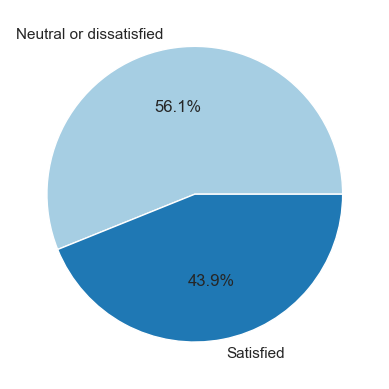

In [70]:
plt.pie(dt.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Paired"), autopct = '%1.1f%%')

##### Percentage of Neutral or dissatisfied passangers are 56.1% and Satisfied passangers are 43.9% so,most of passangers are neutral or dissatisfied.

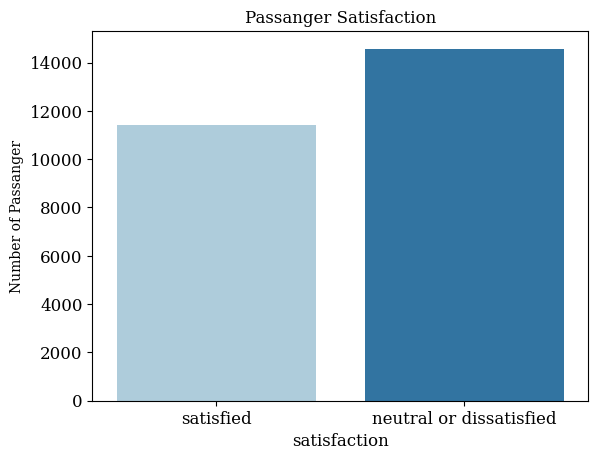

In [37]:
sns.countplot(x=dt.satisfaction, palette = "Paired")
plt.title("Passanger Satisfaction")
plt.ylabel('Number of Passanger', size=10)
plt.show()

#### Number of satisfied passangers are sligtly 11000 and Number of neutral or dissatisfied passangers are over 14000.

In [32]:
dt.groupby(['Gender','satisfaction'])['id'].count()

Gender  satisfaction           
Female  neutral or dissatisfied    7437
        satisfied                  5735
Male    neutral or dissatisfied    7136
        satisfied                  5668
Name: id, dtype: int64

In [33]:
5735/(5735+7437), 5668/(5668+7136)  ## Males are more satisfied than females

(0.4353932584269663, 0.44267416432364887)

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

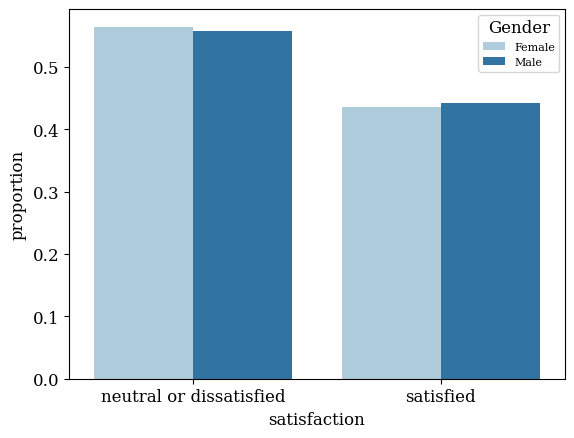

In [38]:
x, y, hue = "satisfaction", "proportion", "Gender"
hue_order = ["Male", "Female"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette = "Paired"))
               

#### Men and Women distribution of neutral/dissatisfied and satisfied in this sample is approximately the same. Customer satisfaction doesn't depend on Gender.

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

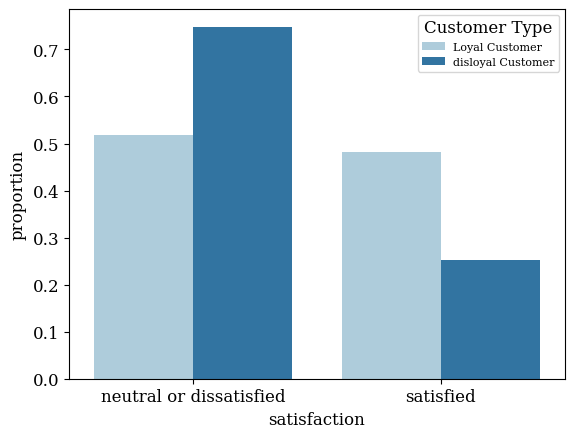

In [35]:
x, y, hue = "satisfaction", "proportion", "Customer Type"
hue_order = ["satisfied", "neurtal or dissatisfied"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette = "Paired"))

#### Disloyal passengers who is neutral/dissatisfied which are high in number(over 0.7 ratio), the ratio of neutral/dissatisfied(loyal passanger) and satisfied(loyal customer) ones are almost close to 0.5 ratio

Text(65.40791666666667, 0.5, 'Number of passangers')

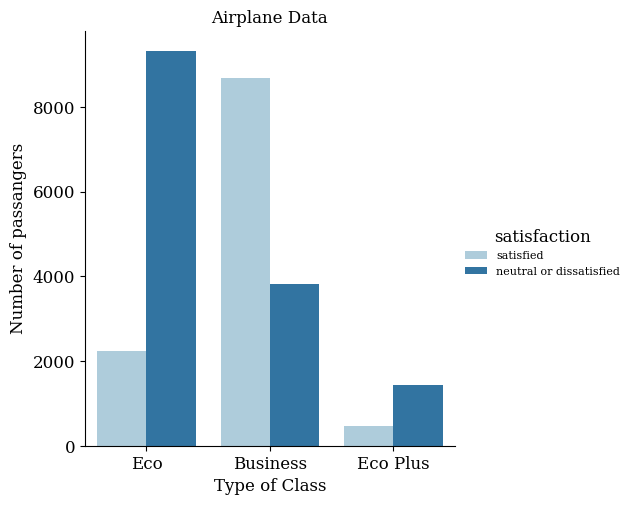

In [36]:
t = sns.catplot(x = "Class", hue = "satisfaction", kind = "count", data = dt, palette = "Paired")
plt.title("Airplane Data")
plt.xlabel("Type of Class")
plt.ylabel("Number of passangers")

##### As we see in the bar chart that the rate of passangers in Eco class increases the dissatisfaction rate. Travel class in the plane of the passengers Economy class has a lot of unsatisfied people unlike Business class. Also, Eco plus has more dissatisfied people than satisfied. Majority of satisfied people prepare to choose business class.
On the other words, about half of the passengers were satisfied in business class and dissatisfied in Eco class. They seem to be the most dissatisfied class besides being loyal passangers.

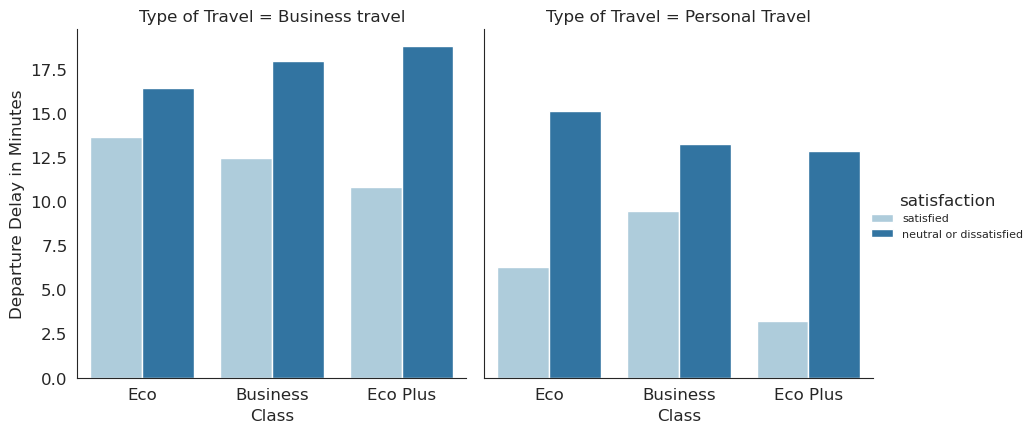

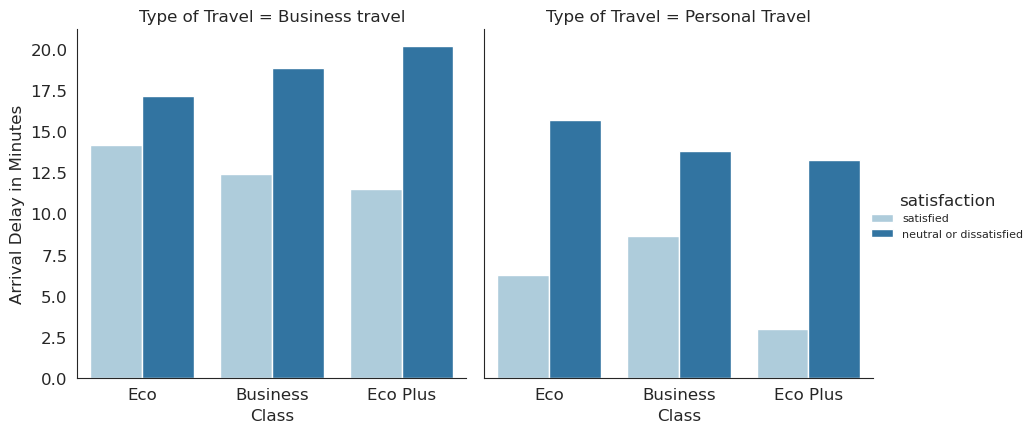

In [43]:
with sns.axes_style('white'):
    t = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", col_wrap = 2, data=dt, kind="bar", height=4.5, aspect=1.0, ci= False, palette = "Paired")
    t = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", col_wrap = 2, data=dt, kind="bar", height=4.5, aspect=1.0, ci= False, palette = "Paired")



#### Purpose of the flight of the passengers Eco and Eco plus classes who travels personel the number of neutral and dissatisfied passangers are high when arrival delay is high. if Arrival Delay and Departure Delay  goes up impact is negative for satistafction. In addition, all combinations have higher number of neutral/dissatisfied passengers who travels business or personal compared to the number of satisfied passengers.

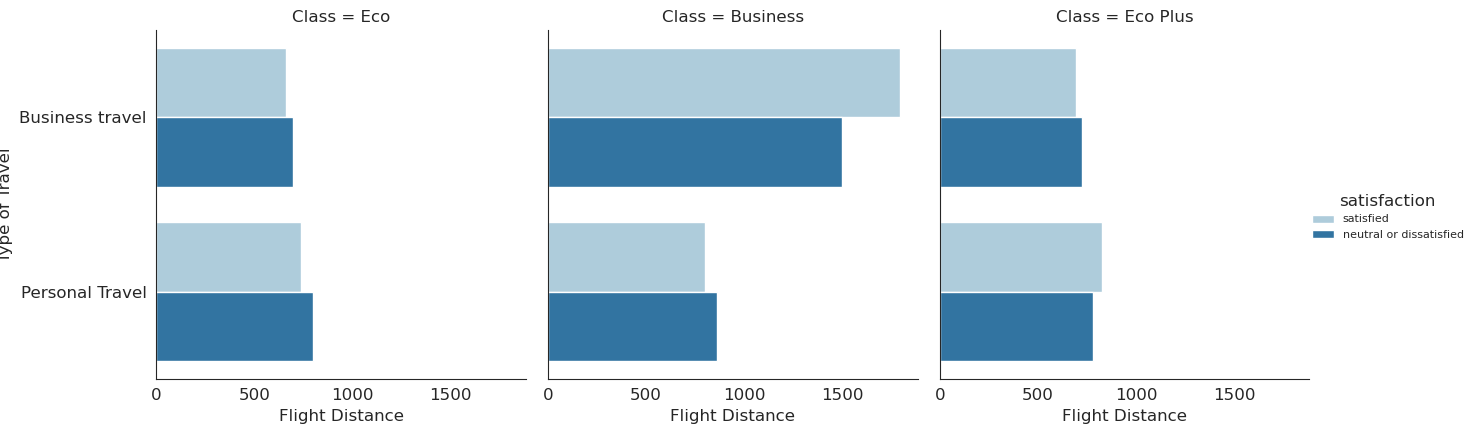

In [44]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue = "satisfaction", col="Class", kind = "bar", data=dt, height=4.5, aspect=1.0, ci= False, palette = "Paired")
    
    ## hue = "satisfaction", col = "Class" bu get rid of class

#### For business travel in business class category, the number of satisfied passengers are quite on the higher for longer flight distance. Customers whose flight distance is long tend to fly in business class. On the other hands, if we look at other combinations almost equal distribution of satisfied and neutral/dissatisfied passengers are.

In [ ]:
# define cmap
cmap = plt.get_cmap("flag_r")
## Generate an array of values to color
x = np.linspace(0, 1, 256)
plt.plot(x, cmap(x))
plt.show()

In [ ]:
print(plt.colormaps())

Text(0.5, 1.0, 'Inflight entertainment Rating Percentage')

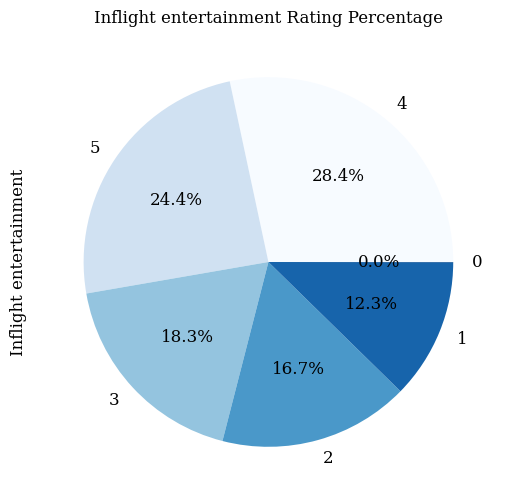

In [46]:
fig, ax = plt.subplots(figsize = (6, 6))
round(dt['Inflight entertainment'].value_counts()/dt.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap="Blues")
plt.title('Inflight entertainment Rating Percentage')

#### Maximum number of satisfied passengers belongs to the category who gave 4 followed by 5 rating. The passengers who gave rating below 4 are mostly neutral/dissatisfied.

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

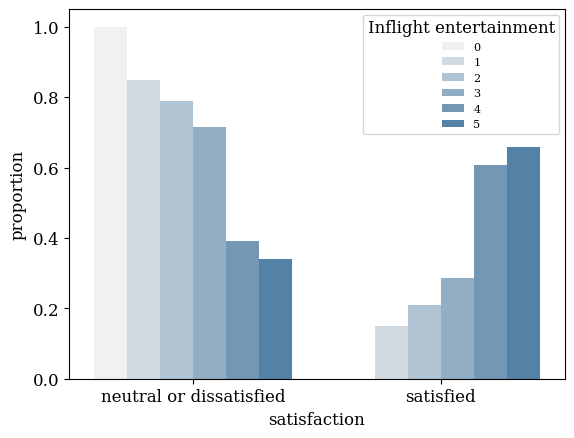

In [47]:
## sns.catplot("Cleanliness", col="satisfaction", col_wrap=5, data=dt, kind="count", height=2.5, aspect=2.0)
x, y, hue = "satisfaction", "proportion", "Inflight entertainment"
hue_order = ["0", "1", "2", "3", "4", "5"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, color = "steelblue"))

#### There are too many passangers rated below 4. They are not happy with their inflight entertainment. Unsatisfied ratio is obviously higher than satisfied.

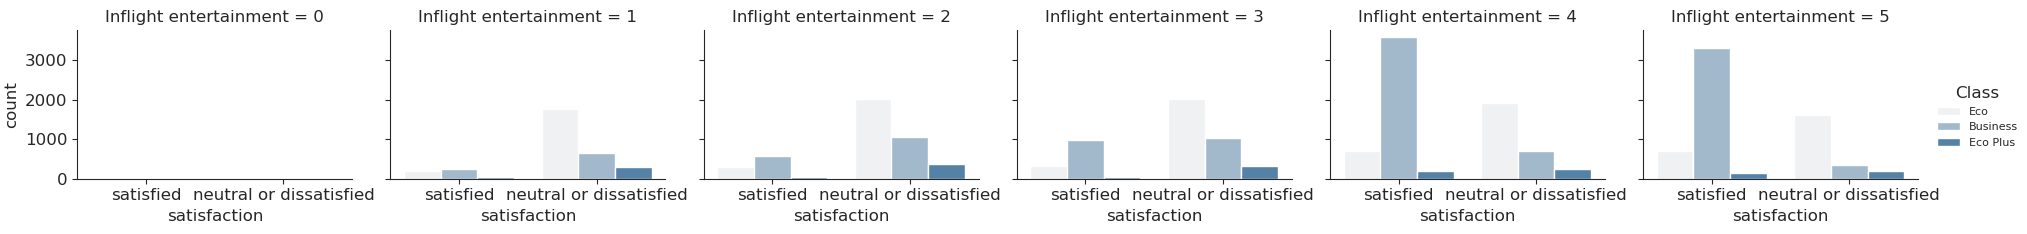

In [52]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Inflight entertainment", hue = "Class", col_wrap=6, data=dt, kind="count", height=2.5, aspect=1.3, color = "steelblue")


#### Business class passengers are mostly satisfied who rated the infliht service 5 out of 5 points. For Eco and Eco plus passangers are rated of in-flight entertainment (below rating 4- 5 rate).  

Text(0.5, 1.0, 'Cleanliness Rating Percentage')

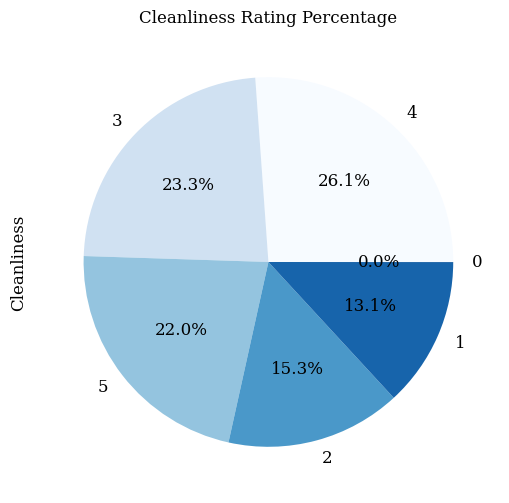

In [53]:
fig, ax = plt.subplots(figsize = (6, 6))
round(dt['Cleanliness'].value_counts()/dt.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap="Blues")
plt.title('Cleanliness Rating Percentage')

#### Maximum number of satisfied passengers belongs to the category who gave 4 followed by 3 rating. As we see that Cleanliness has greatly affects on satisfaction.

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

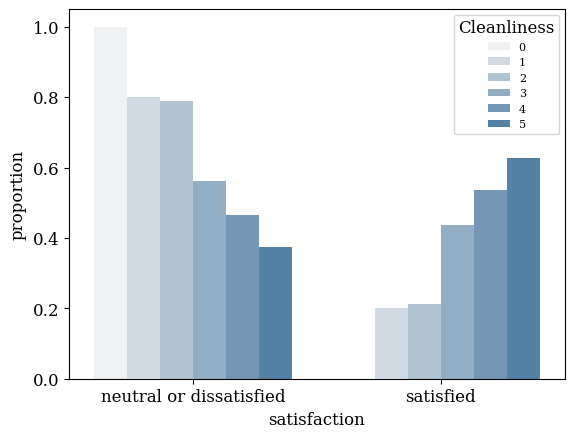

In [54]:
## sns.catplot("Cleanliness", col="satisfaction", col_wrap=5, data=dt, kind="count", height=2.5, aspect=2.0)
x, y, hue = "satisfaction", "proportion", "Cleanliness"
hue_order = ["0", "1", "2", "3", "4", "5"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, color = "steelblue"))

#### When the rate of Cleanliness is high passengers have high satisfaction. On the other words, If 0 perfent satisfaction as cleanliness goes up satisfaction factor goes up as well.

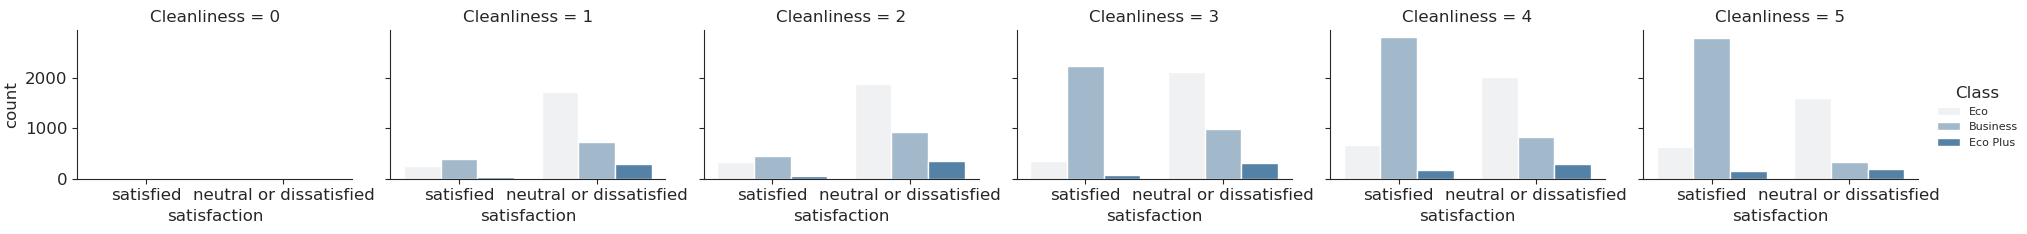

In [55]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", hue = "Class", col_wrap=6, data=dt, kind="count", height=2.5, aspect=1.3, color = "steelblue")

#### Maximum number of satisfied passengers belongs to the category who gave 4 followed by 5 and 3 rating. The passengers who gave rating below 4 are mostly neutral/dissatisfied.

Text(0.5, 1.0, 'Checkin service Rating Percentage')

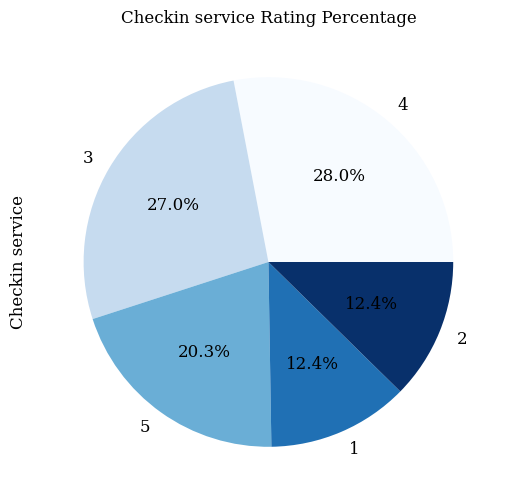

In [56]:
fig, ax = plt.subplots(figsize = (6, 6))
round(dt['Checkin service'].value_counts()/dt.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap="Blues")
plt.title('Checkin service Rating Percentage')

####  Maximum number of satisfied passengers belongs to the category who gave 3, 4 and 5 rating. The passengers who gave rating below 4 are mostly neutral/dissatisfied.

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

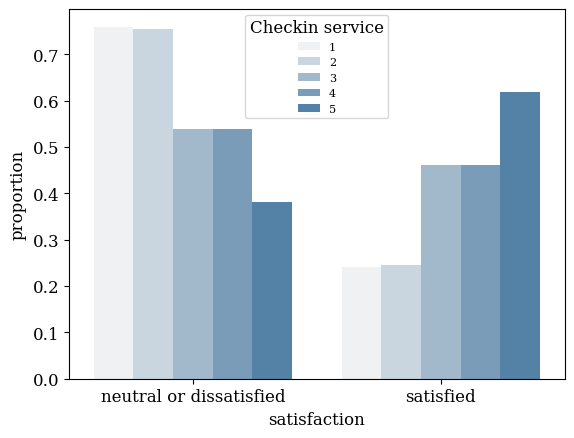

In [57]:
x, y, hue = "satisfaction", "proportion", "Checkin service"
hue_order = ["0", "1", "2", "3", "4", "5"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, color = "steelblue"))

#### Neutral/dissatisfied is too high who gave 1 and 2 rating. Beside this, Neutral/dissatisfied is sligtly higher than satisfied.

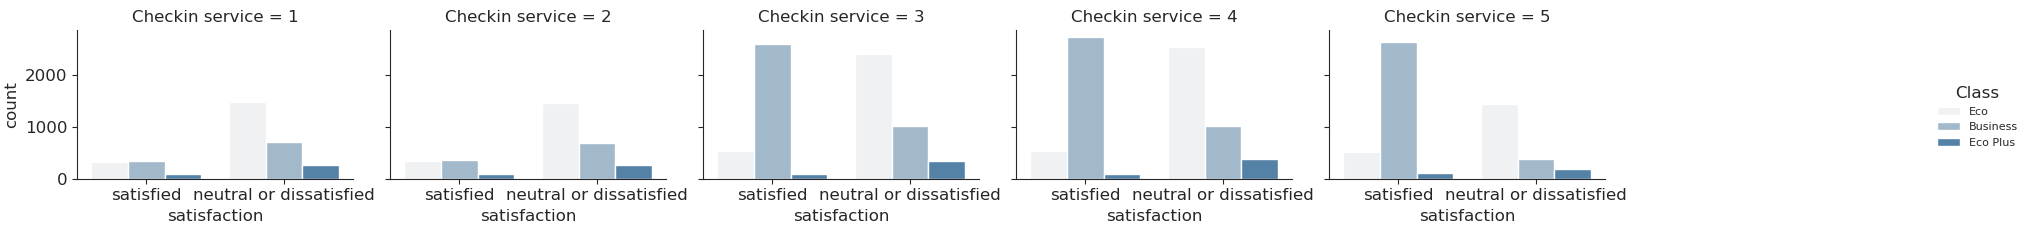

In [58]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Checkin service", hue = "Class", col_wrap=6, data=dt, kind="count", height=2.5, aspect=1.3, color = "steelblue")

#### Mostly Business classes are happy with their checkin service.E co plus passengers gave low number of rate compared to other two classes and, Eco classes passangers are pretty unsatisfied.

Text(0.5, 1.0, 'Baggage handling Rating Percentage')

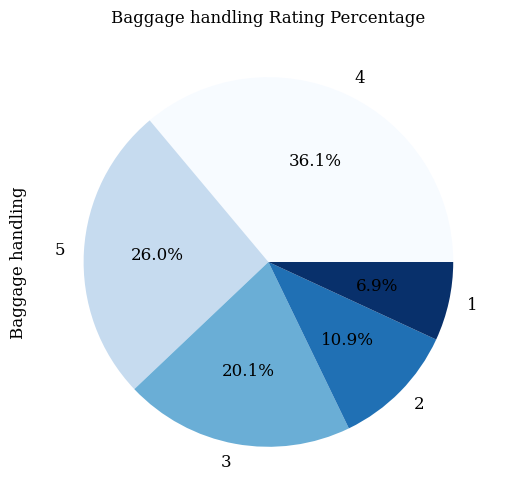

In [59]:
fig, ax = plt.subplots(figsize = (6, 6))
round(dt['Baggage handling'].value_counts()/dt.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap="Blues")
plt.title('Baggage handling Rating Percentage')

#### Most of them are more than 60% of passengers were satisfied baggage handling service (rated 4-5 out of 5).

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

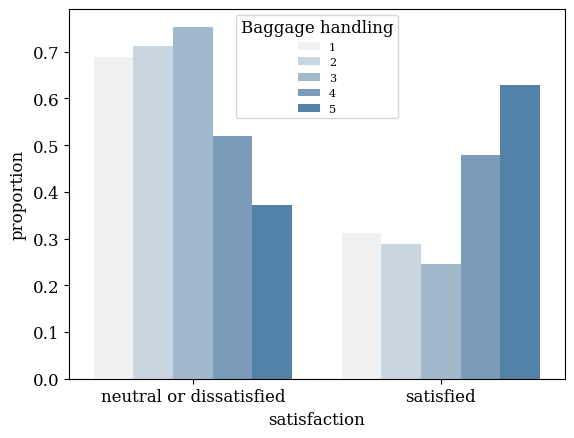

In [60]:
x, y, hue = "satisfaction", "proportion", "Baggage handling"
hue_order = ["0", "1", "2", "3", "4", "5"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, color = "steelblue"))

#### When the rate of Baggage handling is high passengers have high satisfaction. If the rate is low, they are of course neutral/dissatisfied.


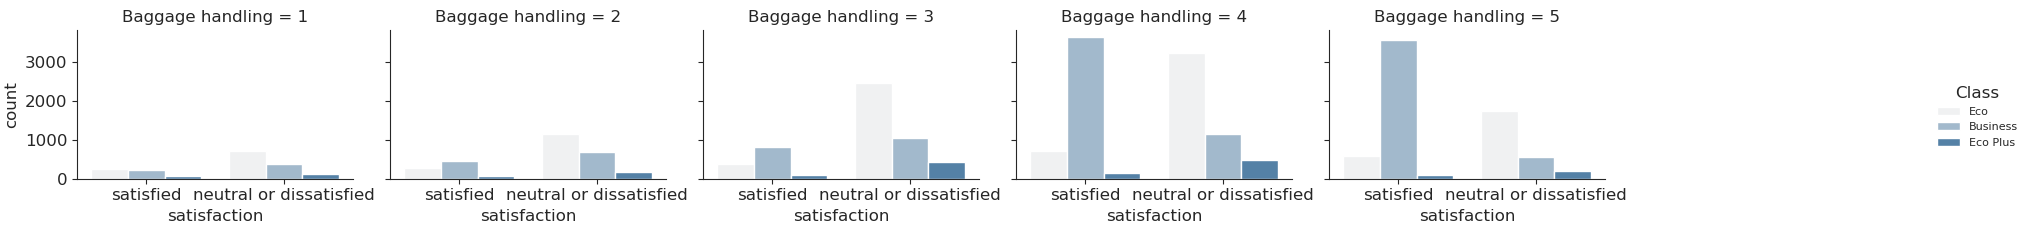

In [61]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Baggage handling", hue = "Class", col_wrap=6, data=dt, kind="count", height=2.5, aspect=1.3, color = "steelblue")

#### Business class passangers are more satisfied than other classes. For Eco class rate was 4 than there was a drop %50 drop. Concentrate on Baggage handling for Eco class.

Text(0.5, 1.0, 'Online boarding Rating Percentage')

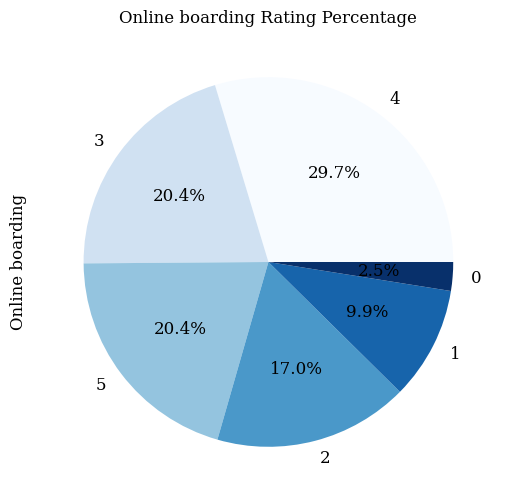

In [62]:
fig, ax = plt.subplots(figsize = (6, 6))
round(dt['Online boarding'].value_counts()/dt.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap="Blues")
plt.title('Online boarding Rating Percentage')

#### Looks like passangers are happy with their online boarding service.

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

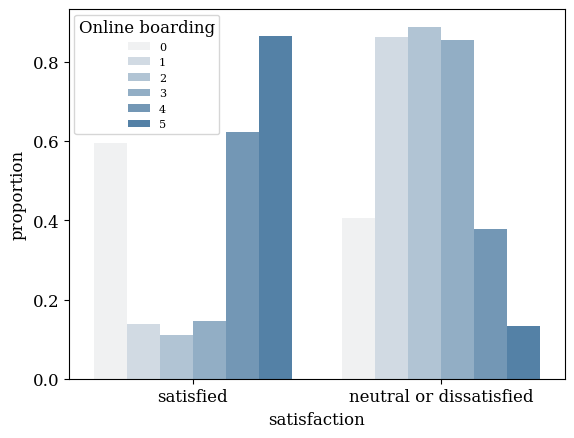

In [63]:
x, y, hue = "satisfaction", "proportion", "Online boarding"
hue_order = ["0", "1", "2", "3", "4", "5"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, color = "steelblue"))

#### Online boarding for satisfied (rating 4 - 5) and very low online boarding (rating 0). For neutral/dissatisfied passangers rating around (1-2-3) can make them dissatisfied.

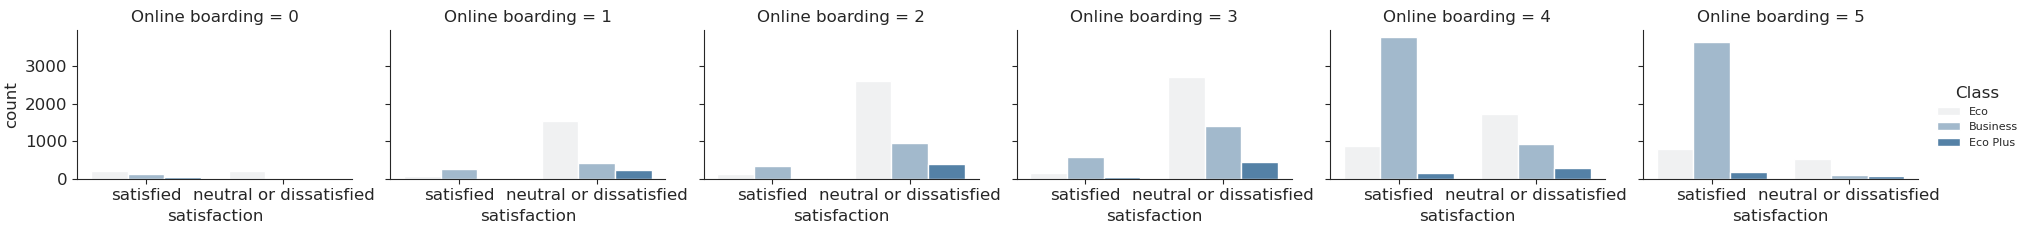

In [64]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Online boarding", hue = "Class", col_wrap=6, data=dt, kind="count", height=2.5, aspect=1.3, color = "steelblue")

#### Business class passangers are more satisfied than other two classes. Eco and Eco plus classes dropped satisfaction of online boarding.

Text(0.5, 1.0, 'Food and drink Rating Percentage')

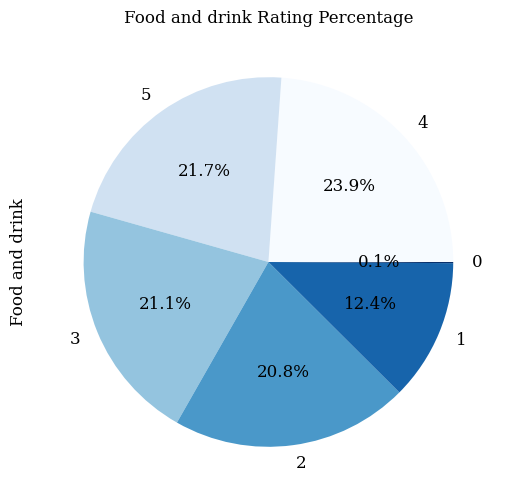

In [65]:
fig, ax = plt.subplots(figsize = (6, 6))
round(dt['Food and drink'].value_counts()/dt.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap="Blues")
plt.title('Food and drink Rating Percentage')

#### The pie chart tells us that some of classes are happy rather than others with their food and drink services. 

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

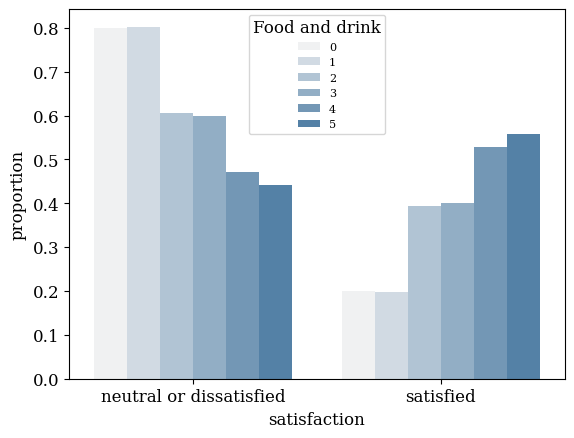

In [66]:
x, y, hue = "satisfaction", "proportion", "Food and drink"
hue_order = ["0", "1", "2", "3", "4", "5"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, color = "steelblue"))

#### Passengers who gave rating below 4 are mostly neutral/dissatisfied. A lot of passangers rated around 2 and 3 which decreases satisfaction rate.

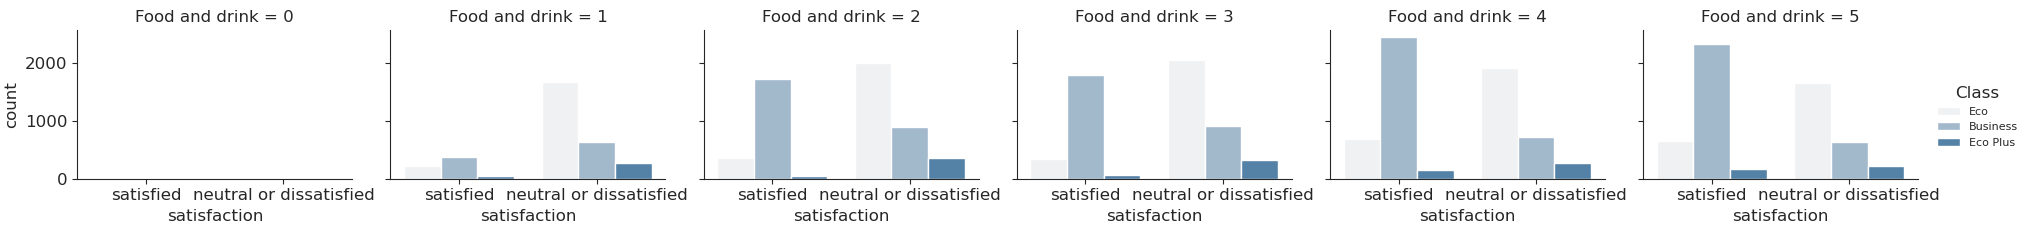

In [67]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food and drink", hue = "Class", col_wrap=6, data=dt, kind="count", height=2.5, aspect=1.3, color = "steelblue")

#### Maximum number of satisfied passengers belongs to Business class who gave most likely 4 and 5 rating and, obviously  Eco and Eco plus classes are effective in decreasing satisfaction.

Text(0.5, 1.0, 'Seat comfort Rating Percentage')

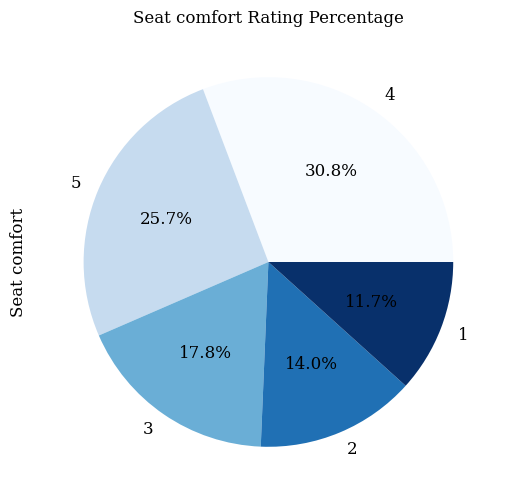

In [68]:
fig, ax = plt.subplots(figsize = (6, 6))
round(dt['Seat comfort'].value_counts()/dt.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap="Blues")
plt.title('Seat comfort Rating Percentage')

#### Seat comfort rating percentage shows that most of passangers(about over %50) gave 4-5 out of 5 rate. 

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

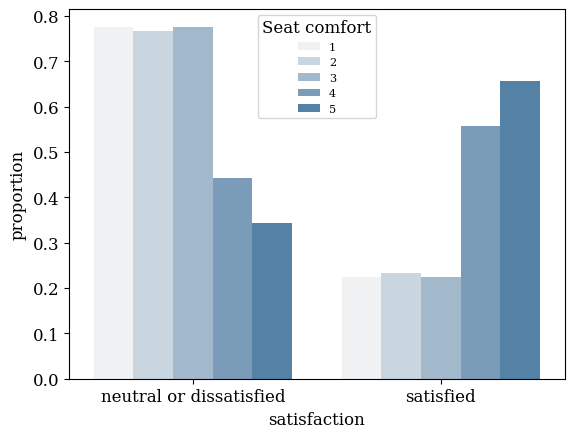

In [69]:
x, y, hue = "satisfaction", "proportion", "Seat comfort"
hue_order = ["0", "1", "2", "3", "4", "5"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, color = "steelblue"))

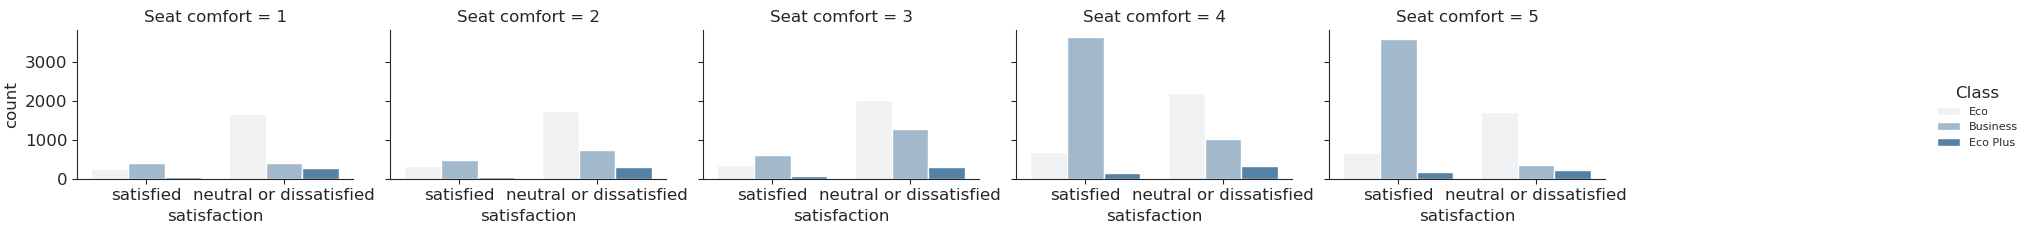

In [70]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", hue = "Class", col_wrap=6, data=dt, kind="count", height=2.5, aspect=1.3, color = "steelblue")

#### Obviously, the satisfied class is the Business class but, you can not say the same result for other classes.

Text(0.5, 1.0, 'Inflight entertainment Rating Percentage')

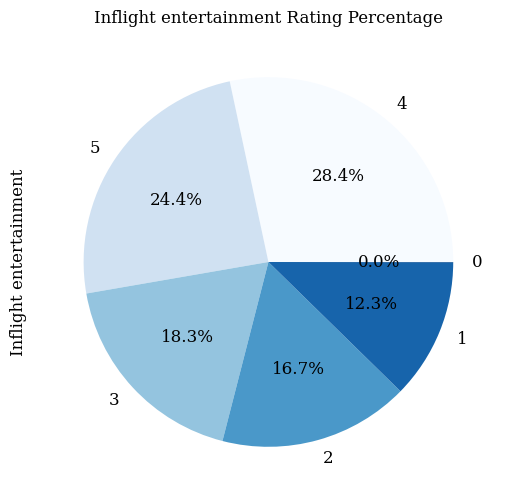

In [71]:
fig, ax = plt.subplots(figsize = (6, 6))
round(dt['Inflight entertainment'].value_counts()/dt.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap="Blues")
plt.title('Inflight entertainment Rating Percentage')

#### There is dissatisfaction as well as satisfaction. But still more than 50% of passengers were satisfied with the Inflight entertainment service (rating 4-5 out of 5).

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

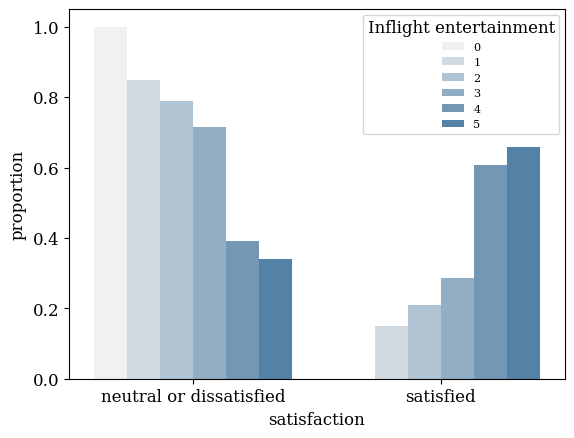

In [72]:
x, y, hue = "satisfaction", "proportion", "Inflight entertainment"
hue_order = ["0", "1", "2", "3", "4", "5"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, color = "steelblue"
      ))

#### As we can see that low rates affect the inflight entertainment service satisfaction rate significantly..

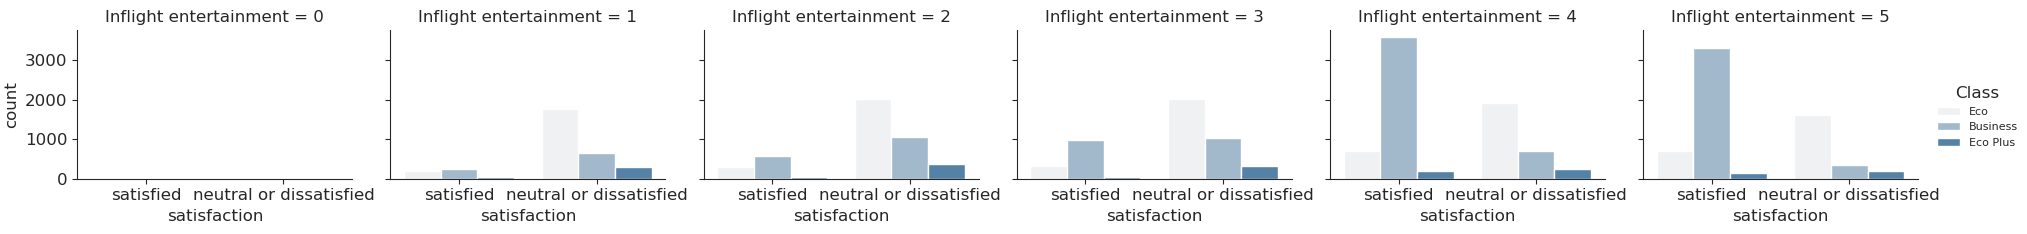

In [73]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Inflight entertainment", hue = "Class", col_wrap=6, data=dt, kind="count", height=2.5, aspect=1.3, color = "steelblue")

#### As we can see, Business class increases the satisfaction rate.

Text(0.5, 1.0, 'Leg room service Rating Percentage')

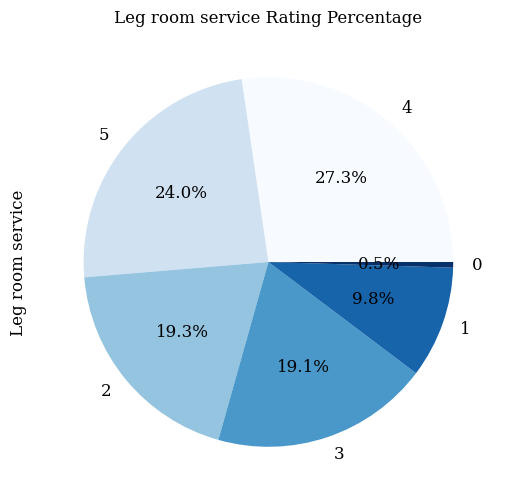

In [74]:
fig, ax = plt.subplots(figsize = (6, 6))
round(dt['Leg room service'].value_counts()/dt.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap="Blues")
plt.title('Leg room service Rating Percentage')

####  The affect of the 4 and 5 rate given on the satisfaction rate is seen.

<AxesSubplot:xlabel='satisfaction', ylabel='proportion'>

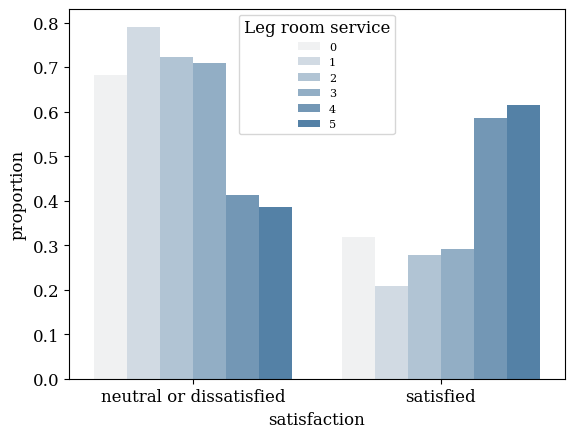

In [75]:
x, y, hue = "satisfaction", "proportion", "Leg room service"
hue_order = ["0", "1", "2", "3", "4", "5"]

(dt[x]
 .groupby(dt[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, color = "steelblue"
      ))

#### When the rate of Leg room service is high passengers have high satisfaction.

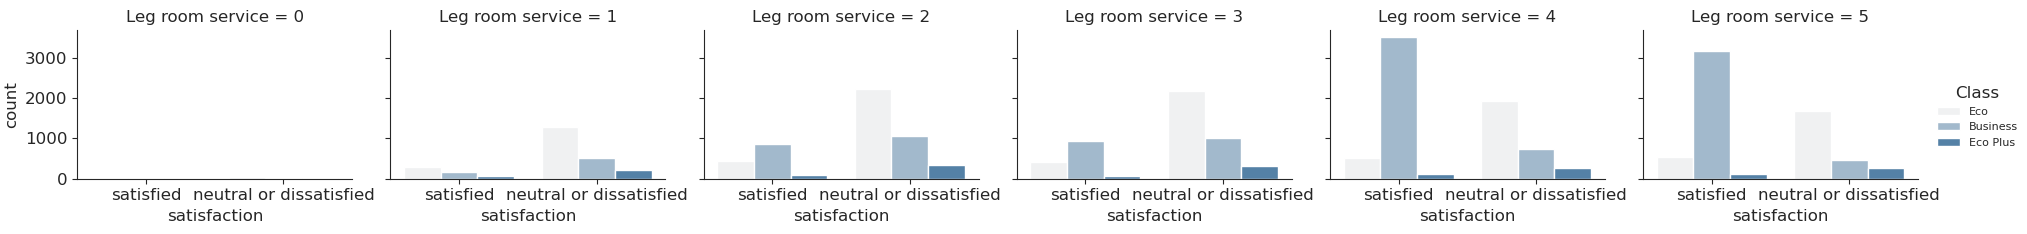

In [76]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Leg room service", hue = "Class", col_wrap=6, data=dt, kind="count", height=2.5, aspect=1.3, color = "steelblue"
                   )

#### Business class are very happy with their leg room service but, eco plus class are pretty dissatisfied. There was a massive difference between of them.

In [77]:
dt[dt.Age == dt['Age'].min()].head(1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
108,73456,Female,Loyal Customer,7,Personal Travel,Eco,1120,3,5,3,...,2,4,4,4,5,5,2,16,13.0,neutral or dissatisfied


In [78]:
dt[dt.Age == dt['Age'].max()].head(1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
4002,100562,Male,disloyal Customer,85,Business travel,Business,486,3,4,4,...,4,5,4,4,3,4,3,8,1.0,neutral or dissatisfied


In [79]:
bins = [0, 10,20, 30, 40, 50, 60, 70, 80]
dt['binned_Age'] = pd.cut(dt['Age'], bins)


<AxesSubplot:>

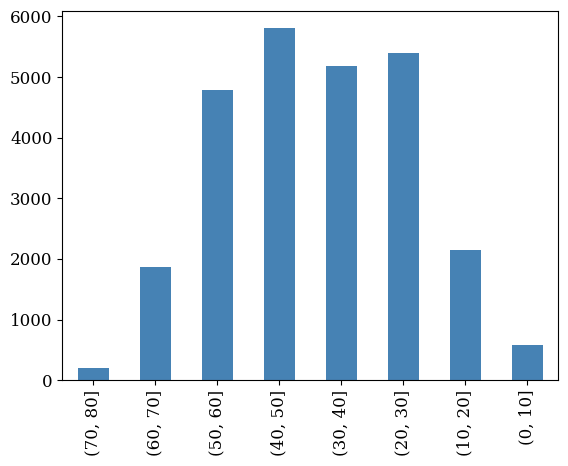

In [80]:
dt['binned_Age'].value_counts().sort_index(ascending=False).plot(kind='bar', color = "steelblue")

#### Passangers ages are between the ages of 30 and 55 (average of age is a little over 40).

In [82]:
dt["Range of Age"]=pd.cut(dt["Age"],bins=[10, 20, 40, 60, 80],right=False)

Text(0.5, 1.0, 'Range of Age Rating Percentage')

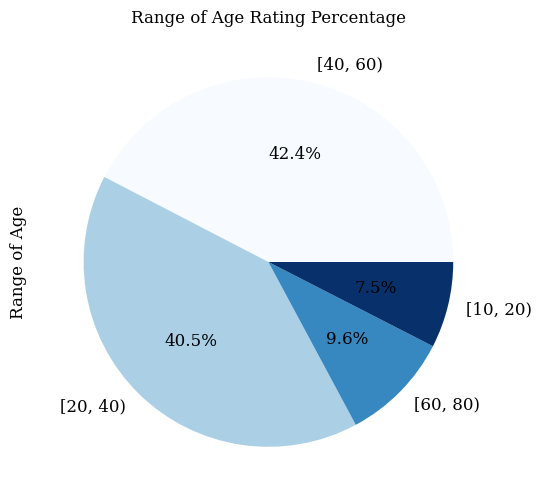

In [83]:
fig, ax = plt.subplots(figsize = (6, 6))
round(dt['Range of Age'].value_counts()/dt.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap="Blues")
plt.title('Range of Age Rating Percentage')

#### Most of passangers are between the ages of 30 and 60(Average age is 40 years old).

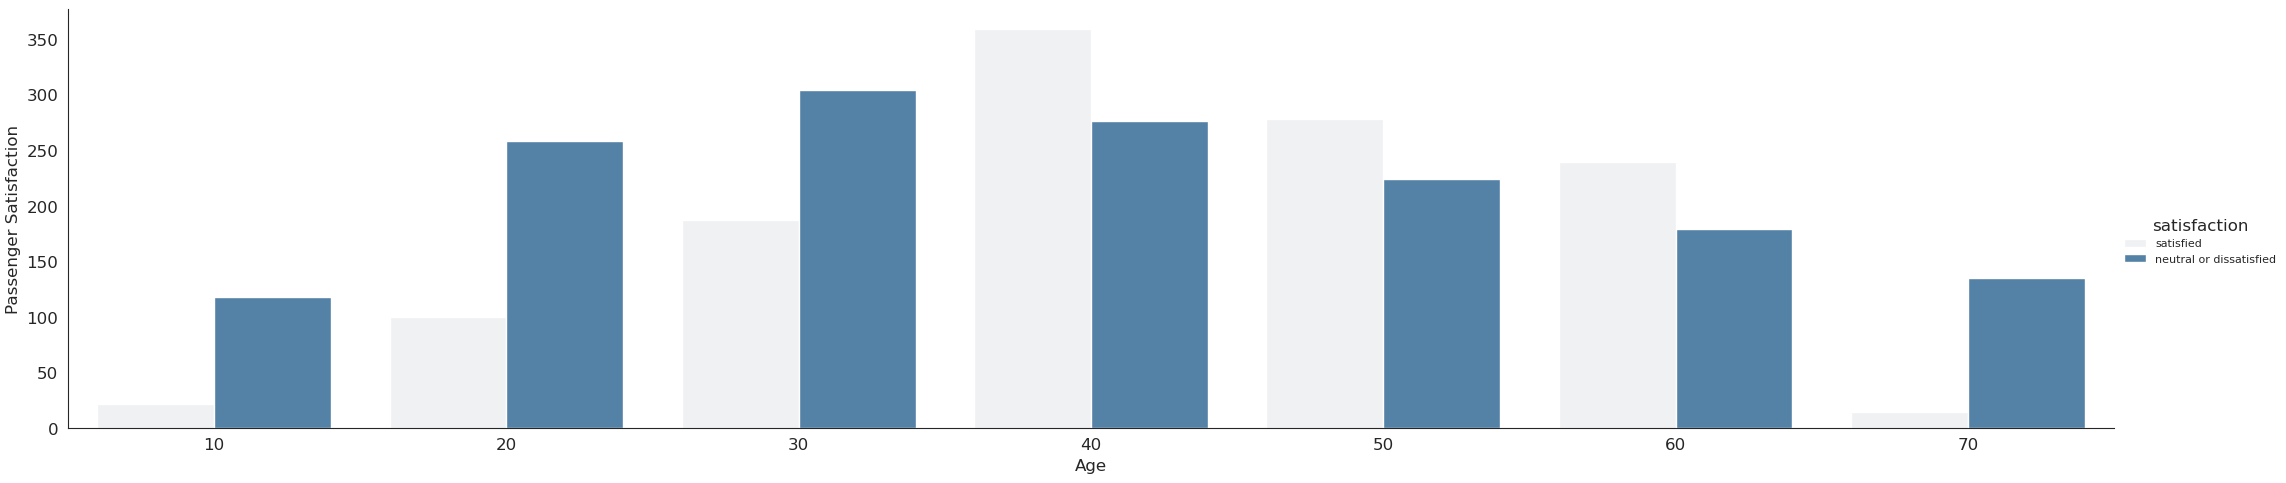

In [85]:
with sns.axes_style('white'):
    tbl = sns.catplot("Age", data=dt, aspect=4.3, kind='count', hue='satisfaction', order=range(10, 80, 10), color = "steelblue")
    tbl.set_ylabels('Passenger Satisfaction')

#### Most of passangers are between From age 10-to-30 the number of neutral/dissatisfied passengers and, Satisfaction decreases from age 55, and from age 40-to-50 the number of satisfied passengers. On the other hand, in age group 10-30, the number of neutral/dissatisfied passengers is higher compared to satisfied passengers unlike in age group 40-50, the number of neutral/dissatisfied passengers.

In [86]:
dt['satisfaction_num'] = np.where(dt['satisfaction']== 'satisfied', 1, 0)

In [ ]:
correlation = dt.corr()
correlation

<AxesSubplot:>

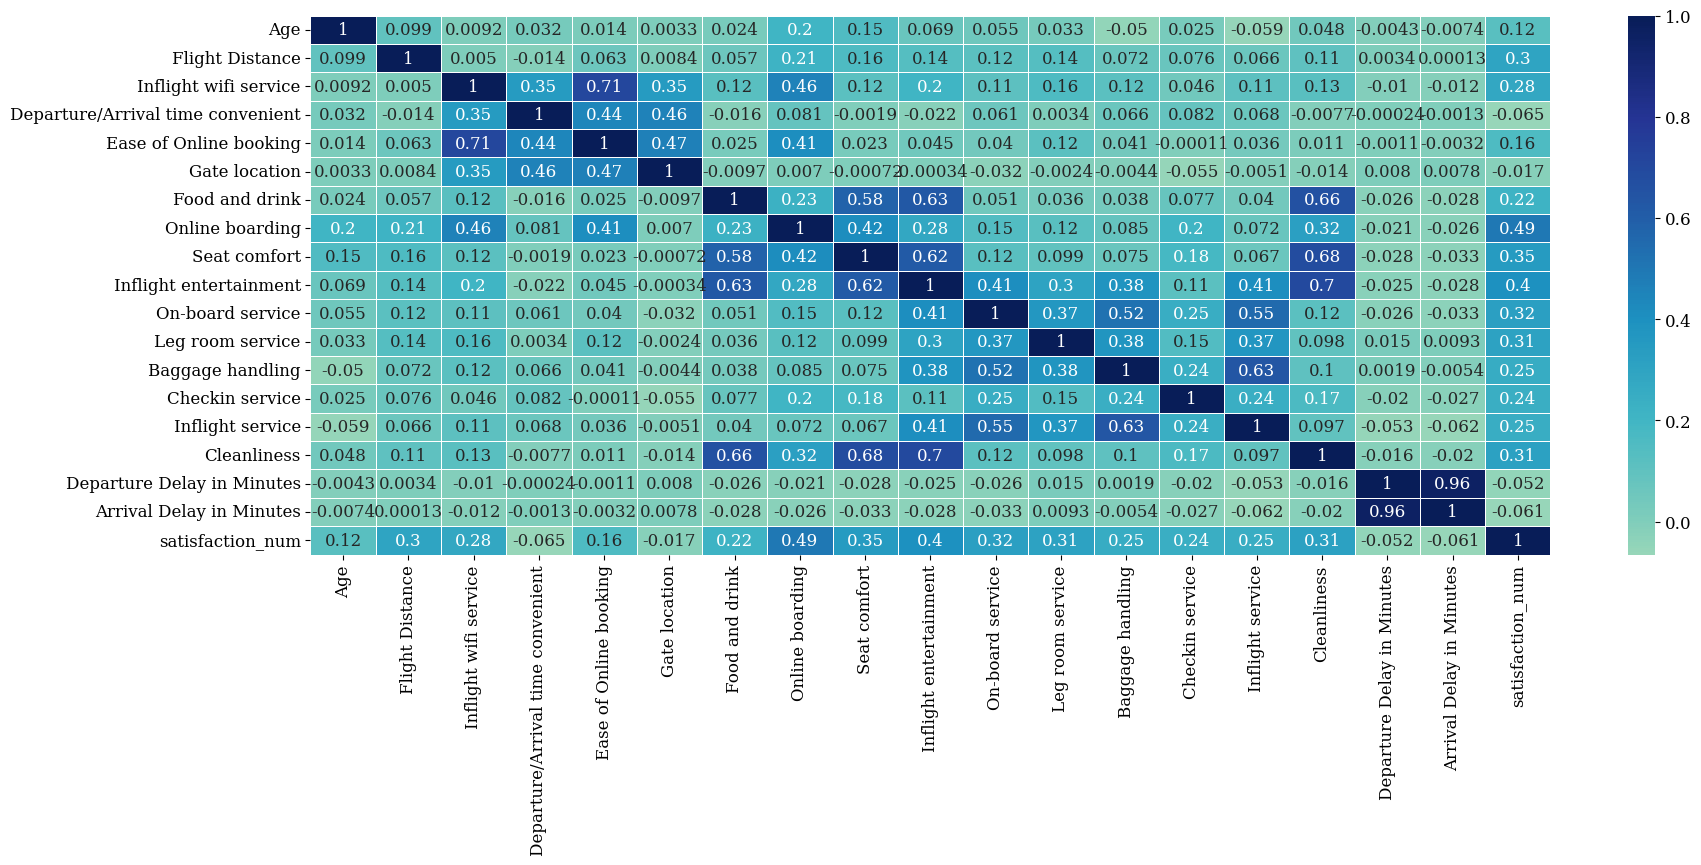

In [108]:
tablo, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation, annot = True, center = 0.2, cmap = 'YlGnBu', linewidths=0.5)
           

#####  - These are correlated but not highly correlated. A correlation can be positive(1) or negative(0). When a correlation is positive there is an increase of value, and is negative value of one variables increases, the other decreases.
#####  - Inflight service is highly correlated with Baggage handling.
#####  - There was a strong correlation which is 96% between Departure delay in minutes and Arrival delay in minutes. if Arrival Delay and Departure Delay  goes up impact is negative for satistafction, so it's not a beneficial correlation.
#####  - There was a correlation seat comfort and Cleanliness, food and drink(%68).
#####  - There was a correlation cleanliness and Food and Drink(%66).
#####  - There was a high vcorrelation Ease of Online booking and Inflight wifi service(%71).
#####  - However, there is no perfect correlation between of them have a correlation coefficient exactly equal to 1. We do not have reliable result (except Departure delay in minutes and Arrival delay in minutes 96%)
#####  - Passanger has delay we know that this passenger are more dissatisfied.



**THE DASHBOARD FEATURES**

   
   ##### - A correlation can be positive(1) or negative(0). When a correlation is positive there is an increase of value, and is negative value of one variables increases, the other decreases. In this data set, There is no perfect correlation between of them have a correlation coefficient exactly equal to 1. We do not have reliable result (except Departure delay in minutes and Arrival delay in minutes 96%). if Arrival Delay and Departure Delay goes up impact is negative for satistafction, so it's not a beneficial correlation.
   ##### - Customer satisfaction doesn't depend on Gender.
   ##### - Business class and travel passangers are more satisfied, and majority of satisfied people prepare to choose business class.
   ##### - They need to Concentrate on Cleanliness, so Cleanliness has greatly affects on satisfaction.
   ##### - Customers provided with services with 4-5 grades are more satisfied.
   ##### - They need to focus and Concentrate on personal travel and Eco class because they are the most dissatisfied passanger. Most of our customers used for business reason rather than personal reasons.
   ##### - Passangers ages are between the ages of 30 and 55 (average of age is a little over 40).
   ##### - In age group 10-30, the number of neutral/dissatisfied passengers is higher compared to satisfied passengers unlike in age group 40-50, the number of neutral/dissatisfied passengers.



**TECHNOLOGIES**

#### To complete this project, I used Python.